In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale # Data scaling
from sklearn import decomposition #PCA

import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
df = pd.read_csv('data skripsi - master.csv')
df.drop('No', inplace=True, axis=1)
df.drop('Date', inplace=True, axis=1)

#df.plot()
df


,Open,High,Low,Close,Volume
0,4380,4380,4380,4380,0
1,4380,4505,4365,4380,82.303.500
2,4385,4390,4265,4380,68.214.000
3,4380,4445,4380,4445,76.567.000
4,4460,4480,4435,4450,65.268.000
...,...,...,...,...,...
1003,7300,7350,7300,7300,30.802.100
1004,7300,7350,7300,7350,20.722.100
1005,7375,7400,7325,7350,39.343.800
1006,7350,7375,7300,7300,42.079.500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    1008 non-null   int64 
 1   High    1008 non-null   int64 
 2   Low     1008 non-null   int64 
 3   Close   1008 non-null   int64 
 4   Volume  1008 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.5+ KB


In [4]:
df.describe()

,Open,High,Low,Close
count,1008.000000,1008.000000,1008.000000,1008.000000
mean,5814.890873,5867.033730,5754.424603,5810.337302
std,858.758623,861.240521,848.895284,853.302763
min,4190.000000,4210.000000,4120.000000,4120.000000
25%,5040.000000,5136.250000,4980.000000,5060.000000
50%,5937.500000,6000.000000,5860.000000,5935.000000
75%,6420.000000,6476.250000,6360.000000,6411.250000
max,7800.000000,8250.000000,7600.000000,7750.000000


In [5]:
data = df[df.Volume != '0']
#data.to_csv('data_clean.csv', index=False)
data

,Open,High,Low,Close,Volume
1,4380,4505,4365,4380,82.303.500
2,4385,4390,4265,4380,68.214.000
3,4380,4445,4380,4445,76.567.000
4,4460,4480,4435,4450,65.268.000
5,4450,4515,4445,4470,57.928.000
...,...,...,...,...,...
1003,7300,7350,7300,7300,30.802.100
1004,7300,7350,7300,7350,20.722.100
1005,7375,7400,7325,7350,39.343.800
1006,7350,7375,7300,7300,42.079.500


In [6]:
datacomplete = pd.read_csv('buku2.csv')
datacomplete_clean =datacomplete.dropna()
datacomplete_clean.info()
#datacomplete_clean.to_csv('datacomplete_clean2.csv', index=True)
#datacomplete_clean.plot()
datacomplete_clean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 59 to 964
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Open                                      906 non-null    float64
 1   High                                      906 non-null    float64
 2   Low                                       906 non-null    float64
 3   Close                                     906 non-null    float64
 4   Volume                                    906 non-null    float64
 5   ma5                                       906 non-null    float64
 6   ma20                                      906 non-null    float64
 7   ma60                                      906 non-null    float64
 8   alexanders filter                         906 non-null    float64
 9   RelativeStrenght                          906 non-null    float64
 10  RSI                                  

,Open,High,Low,Close,Volume,ma5,ma20,ma60,alexanders filter,RelativeStrenght,RSI,Money Flow Index,%B,10 days Volatility,30 days Volatility,Chaikin Oscilator,MACD,Accumulation and Distribution Oscillator,%K,William %R
59,4730.0,4755.0,4685.0,4690.0,66088000.0,4694.0,4652.50,4623.166667,0.643777,1.089382,52.138957,45.240773,0.666741,28.390139,78.540329,37853506.04,11.185815,-3.751192e+07,66.666667,0.333333
60,4690.0,4690.0,4630.0,4665.0,36212500.0,4692.0,4654.00,4627.916667,-1.269841,0.987494,49.685389,38.824648,0.548986,28.848743,77.624452,23992817.05,9.073756,-3.147650e+07,42.424242,0.575758
61,4630.0,4665.0,4565.0,4660.0,77650500.0,4686.0,4655.25,4632.583333,-0.639659,0.967995,49.186850,32.626351,0.521213,29.478806,77.176565,38377649.55,6.916744,3.840895e+07,48.717949,0.512821
62,4690.0,4695.0,4620.0,4680.0,37162500.0,4670.0,4660.50,4636.500000,0.000000,1.053057,51.292152,27.870399,0.591887,29.325757,77.178725,47868135.61,6.743396,6.070645e+07,58.974359,0.410256
63,4675.0,4700.0,4665.0,4680.0,56261000.0,4675.0,4665.75,4640.333333,0.106952,1.053057,51.292152,33.970249,0.572111,29.137605,70.862935,44841640.31,6.530733,5.266916e+07,58.974359,0.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,7300.0,7350.0,7300.0,7300.0,30802100.0,7335.0,7352.50,7393.666667,-1.683502,0.856243,46.127748,31.463332,0.295489,63.442888,81.802608,-40804362.10,-17.704420,-4.852159e+07,11.111111,0.888889
961,7300.0,7350.0,7300.0,7350.0,20722100.0,7330.0,7350.00,7403.500000,0.000000,0.973473,49.327910,33.804431,0.500000,62.449980,79.162281,-35136747.90,-15.901506,-2.779949e+07,33.333333,0.666667
962,7375.0,7400.0,7325.0,7350.0,39343800.0,7325.0,7353.75,7410.000000,-0.338983,0.973473,49.327910,29.589327,0.484597,61.032778,77.320581,-33796755.92,-14.307752,-4.091409e+07,33.333333,0.666667
963,7350.0,7375.0,7300.0,7300.0,42079500.0,7320.0,7353.75,7415.916667,0.000000,0.856961,46.148587,30.291954,0.279229,61.032778,69.020931,-43565076.84,-16.884638,-8.299359e+07,11.111111,0.888889


In [7]:
datacomplete_clean.describe()

,Open,High,Low,Close,Volume,ma5,ma20,ma60,alexanders filter,RelativeStrenght,RSI,Money Flow Index,%B,10 days Volatility,30 days Volatility,Chaikin Oscilator,MACD,Accumulation and Distribution Oscillator,%K,William %R
count,906.000000,906.000000,906.000000,906.000000,9.060000e+02,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,9.060000e+02,906.000000,9.060000e+02,906.000000,906.000000
mean,5931.589404,5987.113687,5866.937086,5926.650110,8.289660e+07,5920.867550,5898.709989,5837.888981,0.744355,1.255988,53.345676,50.597217,0.566229,93.468747,164.543567,1.933707e+05,20.911431,4.698086e+08,56.152653,0.438473
std,817.586572,816.036220,811.420265,811.723532,4.793336e+07,806.883747,791.122502,744.884482,5.412907,0.530078,10.406297,15.286782,0.324371,74.875395,114.547635,8.035044e+07,96.221429,7.764751e+08,29.165887,0.291659
min,4190.000000,4210.000000,4120.000000,4120.000000,1.772200e+07,4217.000000,4344.500000,4471.500000,-30.124224,0.191034,16.039346,9.399312,-0.354056,13.747727,26.162420,-3.870161e+08,-525.357132,-1.408863e+09,0.000000,0.000000
25%,5412.500000,5486.250000,5336.250000,5412.500000,5.396850e+07,5404.250000,5334.812500,5339.229166,-1.550963,0.877620,46.741072,39.240486,0.322739,47.919198,93.298735,-4.681661e+07,-18.488415,-1.110631e+08,33.333333,0.200279
50%,6040.000000,6075.000000,5997.500000,6030.000000,7.215875e+07,6040.500000,6034.000000,6018.333333,0.481724,1.165384,53.818821,50.201282,0.592799,74.141753,128.073103,4.332427e+06,24.293538,4.995945e+08,59.400615,0.405994
75%,6500.000000,6547.500000,6420.000000,6487.500000,9.670702e+07,6476.000000,6431.875000,6366.166667,3.169241,1.570471,61.096620,61.549285,0.805351,114.633110,199.137751,5.051831e+07,86.546500,1.043654e+09,79.972067,0.666667
max,7800.000000,8250.000000,7600.000000,7750.000000,5.379715e+08,7620.000000,7507.500000,7417.916667,26.297968,3.972490,79.889351,91.990327,1.508908,587.157560,745.312407,2.263684e+08,279.597348,1.906157e+09,100.000000,1.000000


In [8]:
#Normalizing the data

data_n = datacomplete_clean.copy()
data_n= (datacomplete_clean - datacomplete_clean.min())/(datacomplete_clean.max() - datacomplete_clean.min())
#data_n.to_csv('data_Normalize2.csv', index=True)

In [9]:
x = data_n.drop(labels='Close', axis=1).values
y = data_n['Close'].values

print(x.shape, y.shape)
y


(906, 19) (906,)


array([0.15702479, 0.15013774, 0.14876033, 0.15426997, 0.15426997,
       0.14876033, 0.13498623, 0.11707989, 0.11983471, 0.14876033,
       0.15013774, 0.14049587, 0.12672176, 0.13085399, 0.1322314 ,
       0.12809917, 0.08264463, 0.12672176, 0.09366391, 0.0785124 ,
       0.09366391, 0.0785124 , 0.12672176, 0.1184573 , 0.13085399,
       0.08815427, 0.09779614, 0.07713499, 0.06060606, 0.05785124,
       0.07713499, 0.07713499, 0.10192837, 0.10743802, 0.12396694,
       0.11570248, 0.11570248, 0.12809917, 0.11707989, 0.13360882,
       0.13085399, 0.09090909, 0.04958678, 0.03030303, 0.07300275,
       0.08815427, 0.04269972, 0.04132231, 0.01928375, 0.04820937,
       0.04683196, 0.        , 0.03443526, 0.03443526, 0.01790634,
       0.07162534, 0.07162534, 0.09504132, 0.12258953, 0.13360882,
       0.13911846, 0.11707989, 0.14325069, 0.14325069, 0.13774105,
       0.15151515, 0.16115702, 0.16391185, 0.15013774, 0.1446281 ,
       0.14738292, 0.14738292, 0.1584022 , 0.15702479, 0.15702

In [10]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    def covariance_matrix(self):
        return self.cov_matrix
    
    def eigen_value(self):
        return self.eigen_values
    
    def eigen_vector(self):
        return self.eigen_vectors
    
    def sorted_component(self):
        return self.sorted_components

    def projection_matrik(self):
        return self.projection_matrix

    def explained_varian_ratio(self):
        return self.explained_variance_ratio
    
    def explained_varian(self):
        return self.explained_variance
   
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        self.cov_matrix = cov_matrix
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [11]:
pca = convers_pca(no_of_components=6)
pca.fit(x)


In [12]:
x_std = pca.transform(x)

hasil =  pd.DataFrame(x_std, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
hasil['y'] = y
hasil = hasil[['y', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
hasil
#hasil.to_csv('data_PCA2.csv', index=True)



,y,PC1,PC2,PC3,PC4,PC5,PC6
0,0.157025,0.884639,-0.131140,-0.064416,0.224043,0.060467,0.026444
1,0.150138,0.902859,0.196972,0.031382,0.191232,0.156354,0.063337
2,0.148760,0.923526,0.152088,0.013799,0.216780,0.071013,0.130122
3,0.154270,0.907937,0.021235,-0.006062,0.278664,0.009321,0.173167
4,0.154270,0.900801,0.006864,-0.008756,0.251432,0.034537,0.120619
...,...,...,...,...,...,...,...
901,0.876033,-1.016420,0.738469,0.078172,0.185004,0.101650,0.023982
902,0.889807,-1.020343,0.427536,0.004384,0.239315,0.001787,0.011733
903,0.889807,-1.035059,0.444424,0.000197,0.255263,-0.017569,0.058544
904,0.876033,-1.024991,0.743163,0.074454,0.201641,0.103478,0.033174


In [13]:
#inverse_transform
x_invers = pca.transform(x)

In [14]:
cov=pca.covariance_matrix()
out= pd.DataFrame(cov)
a=np.asmatrix(cov)
out.to_csv('covarianmatrix.csv', index=False)
out



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.051292,0.045548,0.052649,-0.001266,0.053430,0.054798,0.051091,0.003470,0.006872,0.008056,0.005126,0.004944,-0.000211,0.002176,0.000700,0.009497,0.001881,0.001785,-0.001785
1,0.045548,0.040800,0.046819,-0.000405,0.047544,0.048942,0.045877,0.003041,0.006514,0.007350,0.004717,0.004832,0.000911,0.002914,0.000343,0.008040,0.001303,0.002138,-0.002138
2,0.052649,0.046819,0.054367,-0.001843,0.054946,0.056185,0.052153,0.003936,0.007732,0.009250,0.005708,0.006026,-0.001064,0.001443,0.001269,0.010187,0.002582,0.003388,-0.003388
3,-0.001266,-0.000405,-0.001843,0.008489,-0.001286,-0.000202,0.001584,-0.001619,-0.000896,-0.002708,-0.001529,-0.002024,0.006540,0.005425,-0.002809,-0.002980,-0.003667,-0.003393,0.003393
4,0.053430,0.047544,0.054946,-0.001286,0.056221,0.057925,0.054027,0.002921,0.006218,0.007135,0.004321,0.003710,-0.000311,0.002170,0.000355,0.009626,0.001999,-0.000234,0.000234
5,0.054798,0.048942,0.056185,-0.000202,0.057925,0.062559,0.059940,-0.001543,0.001250,0.000820,-0.002438,-0.002269,0.001204,0.003201,-0.004535,0.004975,0.000174,-0.009172,0.009172
6,0.051091,0.045877,0.052153,0.001584,0.054027,0.059940,0.063913,-0.003162,-0.003923,-0.005806,-0.005904,-0.005467,0.005123,0.007498,-0.008860,-0.002721,-0.007856,-0.013466,0.013466
7,0.003470,0.003041,0.003936,-0.001619,0.002921,-0.001543,-0.003162,0.009204,0.009618,0.011989,0.012112,0.012003,-0.001325,-0.000477,0.007833,0.007575,0.002412,0.018581,-0.018581
8,0.006872,0.006514,0.007732,-0.000896,0.006218,0.001250,-0.003923,0.009618,0.019650,0.021775,0.018730,0.020867,-0.000239,0.000062,0.011790,0.012120,0.010158,0.029348,-0.029348
9,0.008056,0.007350,0.009250,-0.002708,0.007135,0.000820,-0.005806,0.011989,0.021775,0.026563,0.022170,0.025514,-0.003479,-0.002027,0.014525,0.015275,0.012774,0.037027,-0.037027


In [15]:
#eigen_value
eigen_value=pca.eigen_value()
# a=np.asmatrix(cov)
eigen_value

array([ 3.19209306e-01,  2.68423969e-01,  6.24796064e-02,  3.25053395e-02,
        3.08323296e-02,  1.11334465e-02,  8.51717826e-03,  7.43914122e-03,
        5.00206031e-03,  4.50556776e-03,  3.21957147e-03,  1.70797905e-03,
        5.63499722e-04,  3.80771358e-04,  2.94179091e-04,  1.28036890e-04,
        1.01575301e-04,  5.14541220e-05, -2.91243374e-17])

In [16]:
# eigen_vector
eigen_vector=pca.eigen_vector()
out_eigen_vector= pd.DataFrame(cov)
out_eigen_vector.to_csv('eigen_vector.csv', index=False)
eigen_vector

array([[-3.98405131e-01, -3.55557194e-01, -4.09362203e-01,
         4.98363351e-03, -4.17747484e-01, -4.36065061e-01,
        -4.16496729e-01, -1.56060696e-02, -3.98102910e-02,
        -4.38673980e-02, -2.43933041e-02, -2.38833780e-02,
        -7.14012393e-03, -2.62728148e-02,  8.73325701e-03,
        -5.66732203e-02, -4.73399007e-03,  8.51402691e-03,
        -8.51402691e-03],
       [-2.52706224e-02, -2.47319717e-02, -3.69633910e-02,
         3.09000010e-02, -1.18858418e-02,  6.11340930e-02,
         1.12712506e-01, -1.40305683e-01, -2.29566910e-01,
        -2.84472557e-01, -2.62220080e-01, -3.11354596e-01,
         3.15758859e-02,  3.12368751e-02, -1.80631027e-01,
        -1.41182171e-01, -1.44656500e-01, -5.41006131e-01,
         5.41006131e-01],
       [ 2.74247706e-02,  1.65110736e-03,  4.03267510e-02,
        -1.25471234e-01,  3.95752797e-02,  2.37307695e-02,
        -1.49185889e-01, -2.08545596e-02,  3.70820720e-02,
         7.56224178e-02, -3.37596390e-03, -5.03850915e-02,
    

In [17]:
#sorted_components
sorted_component=pca.sorted_component()
sorted_component

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

In [18]:
#projection_matrik
projection_matrik=pca.projection_matrik()
projection_matrik

array([[-3.98405131e-01, -3.55557194e-01, -4.09362203e-01,
         4.98363351e-03, -4.17747484e-01, -4.36065061e-01,
        -4.16496729e-01, -1.56060696e-02, -3.98102910e-02,
        -4.38673980e-02, -2.43933041e-02, -2.38833780e-02,
        -7.14012393e-03, -2.62728148e-02,  8.73325701e-03,
        -5.66732203e-02, -4.73399007e-03,  8.51402691e-03,
        -8.51402691e-03],
       [-2.52706224e-02, -2.47319717e-02, -3.69633910e-02,
         3.09000010e-02, -1.18858418e-02,  6.11340930e-02,
         1.12712506e-01, -1.40305683e-01, -2.29566910e-01,
        -2.84472557e-01, -2.62220080e-01, -3.11354596e-01,
         3.15758859e-02,  3.12368751e-02, -1.80631027e-01,
        -1.41182171e-01, -1.44656500e-01, -5.41006131e-01,
         5.41006131e-01],
       [ 2.74247706e-02,  1.65110736e-03,  4.03267510e-02,
        -1.25471234e-01,  3.95752797e-02,  2.37307695e-02,
        -1.49185889e-01, -2.08545596e-02,  3.70820720e-02,
         7.56224178e-02, -3.37596390e-03, -5.03850915e-02,
    

In [19]:
#explained_varian_ratio
explained_varian_ratio=pca.explained_varian_ratio()
explained_varian_ratio

array([ 4.21958244e-01,  3.54825828e-01,  8.25909034e-02,  4.29683461e-02,
        4.07568181e-02,  1.47171446e-02,  1.12587368e-02,  9.83369500e-03,
        6.61215240e-03,  5.95584597e-03,  4.25590575e-03,  2.25775322e-03,
        7.44882271e-04,  5.03336245e-04,  3.88871157e-04,  1.69250144e-04,
        1.34270947e-04,  6.80164723e-05, -3.84990475e-17])

In [20]:
#explained_varian
explained_varian=pca.explained_varian()
explained_varian

array([ 3.19209306e-01,  2.68423969e-01,  6.24796064e-02,  3.25053395e-02,
        3.08323296e-02,  1.11334465e-02,  8.51717826e-03,  7.43914122e-03,
        5.00206031e-03,  4.50556776e-03,  3.21957147e-03,  1.70797905e-03,
        5.63499722e-04,  3.80771358e-04,  2.94179091e-04,  1.28036890e-04,
        1.01575301e-04,  5.14541220e-05, -2.91243374e-17])

In [21]:
pcas = decomposition.PCA(n_components=6)
pcas.fit(x)

PCA(n_components=6)

In [22]:
scores = pcas.transform(x)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.884639,-0.131140,0.064416,-0.224043,-0.060467,0.026444
1,0.902859,0.196972,-0.031382,-0.191232,-0.156354,0.063337
2,0.923526,0.152088,-0.013799,-0.216780,-0.071013,0.130122
3,0.907937,0.021235,0.006062,-0.278664,-0.009321,0.173167
4,0.900801,0.006864,0.008756,-0.251432,-0.034537,0.120619
...,...,...,...,...,...,...
901,-1.016420,0.738469,-0.078172,-0.185004,-0.101650,0.023982
902,-1.020343,0.427536,-0.004384,-0.239315,-0.001787,0.011733
903,-1.035059,0.444424,-0.000197,-0.255263,0.017569,0.058544
904,-1.024991,0.743163,-0.074454,-0.201641,-0.103478,0.033174


In [23]:
explained_variance = pcas.explained_variance_ratio_
explained_variance

array([0.42195824, 0.35482583, 0.0825909 , 0.04296835, 0.04075682,
       0.01471714])

In [24]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance.to_csv('df_explained_variance.csv', index=False)
df_explained_variance



,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.421958,0.422
2,PC2,0.354826,0.777
3,PC3,0.082591,0.860
4,PC4,0.042968,0.903
5,PC5,0.040757,0.944
6,PC6,0.014717,0.959


In [25]:
#SVM
dimensions = 1
data_cn = pd.concat([hasil.shift(i) for i in range(0 + dimensions + 1)], axis = 1)
data_cn

,y,PC1,PC2,PC3,PC4,PC5,PC6,y,PC1,PC2,PC3,PC4,PC5,PC6
0,0.157025,0.884639,-0.131140,-0.064416,0.224043,0.060467,0.026444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.150138,0.902859,0.196972,0.031382,0.191232,0.156354,0.063337,0.157025,0.884639,-0.131140,-0.064416,0.224043,0.060467,0.026444
2,0.148760,0.923526,0.152088,0.013799,0.216780,0.071013,0.130122,0.150138,0.902859,0.196972,0.031382,0.191232,0.156354,0.063337
3,0.154270,0.907937,0.021235,-0.006062,0.278664,0.009321,0.173167,0.148760,0.923526,0.152088,0.013799,0.216780,0.071013,0.130122
4,0.154270,0.900801,0.006864,-0.008756,0.251432,0.034537,0.120619,0.154270,0.907937,0.021235,-0.006062,0.278664,0.009321,0.173167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,0.876033,-1.016420,0.738469,0.078172,0.185004,0.101650,0.023982,0.876033,-1.022883,0.738155,0.084791,0.190750,0.094875,0.059101
902,0.889807,-1.020343,0.427536,0.004384,0.239315,0.001787,0.011733,0.876033,-1.016420,0.738469,0.078172,0.185004,0.101650,0.023982
903,0.889807,-1.035059,0.444424,0.000197,0.255263,-0.017569,0.058544,0.889807,-1.020343,0.427536,0.004384,0.239315,0.001787,0.011733
904,0.876033,-1.024991,0.743163,0.074454,0.201641,0.103478,0.033174,0.889807,-1.035059,0.444424,0.000197,0.255263,-0.017569,0.058544


In [26]:
# Splitting the data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[1:,1:]

y = data_cn.iloc[1:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.3, shuffle = False)



In [27]:
def pso(n_particles, iterations, dimensions, inertia):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    
    # Initializing particles' positions randomly, inside
    # the search space
    x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
    y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
    z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

    c = np.concatenate((x,y,z), axis=1)

    # Initializing particles' parameters
    v = np.zeros((n_particles, dimensions))
    c1 = 2
    c2 = 2
    p_best = np.zeros((n_particles, dimensions))
    p_best_val = np.zeros(n_particles) + sys.maxsize  
    g_best = np.zeros(dimensions)
    g_best_val = sys.maxsize

    best_iter = np.zeros(iterations)

    # Initializing regression variables
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    

    # Displaying tridimensional search space
    plot(c)

    from sklearn.metrics import mean_squared_error
    
    for i in range(iterations):

        for j in range(n_particles):
            #print('iterasi ke # %i = %f \n'%(i, j))
            # Starting Regression
            rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])
            #print('1')
            # Fitting the curve
            rgs.fit(X_train, y_train)
            #print('2')
            y_predict = rgs.predict(X_val)
            #print('3')
            # Using Mean Squared Error to verify prediction accuracy
            mse = mean_squared_error(y_val, y_predict) 
            #print('4')
            # If mse value for that search point, for that particle,
            # is less than its personal best point,
            # replace personal best
            if(mse < p_best_val[j]):   # mse < p_best_val[j]
                # The value below represents the current least Mean Squared Error
                p_best_val[j] = mse
                
                p_best_RGS[j] = rgs
                

                # The value below represents the current search coordinates for
                # the particle's current least Mean Squared Error found
                p_best[j] = c[j].copy()
                
            # Using auxiliar variable to get the index of the
            # particle that found the configuration with the 
            # minimum MSE value
            aux = np.argmin(p_best_val)        
            
            if(p_best_val[aux] < g_best_val):
                # Assigning Particle's current best MSE to the Group's best    
                g_best_val = p_best_val[aux]

                # Assigning Particle's current best configuration to the Group's best
                g_best = p_best[aux].copy()

                # Group best regressor:
                # the combination of C, Epsilon and Gamma
                # that computes the best fitting curve
                g_best_RGS = p_best_RGS[aux]

            
            rand1 = np.random.random()
            rand2 = np.random.random()

            # The variable below influences directly the particle's velocity.
            # It can either make it smaller or bigger. 
            w = inertia

            # The equation below represents Particle's velocity, which is
            # the rate of change in its position
            v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

            # Change in the Particle's position 
            c[j] = c[j] + v[j]

            # Below is a series of conditions that stop the particles from
            # leaving the search space
            if(c[j][2] < min_g):
                c[j][2] = min_g
            if(c[j][2] > max_g):
                c[j][2] = max_g
            if(c[j][1] < min_e):
                c[j][1] = min_e
            if(c[j][1] > max_e):
                c[j][1] = max_e
            if(c[j][0] < min_c):
                c[j][0] = min_c
            if(c[j][0] > max_c):
                c[j][0] = max_c
                
        
        # The variable below represents the least Mean Squared Error
        # of the current iteration
        best_iter[i] = g_best_val
                
        print('Best value iteration # %d = %f\n'%(i, g_best_val))

    # Coordinates found after all the iterations
    print('Group Best configuration found: ')
    print(g_best)
    print('\n')
    print('Best Regressor:\n')
    print(g_best_RGS)
    print('\n')
    # Displaying the MSE value variation throughout the iterations
    t = range(iterations)
    plt.plot(t, best_iter, label='Fitness Value')
    plt.legend()
    plt.show()

    # Displaying Particles' final configuration
    plot(c)

    # Making the prediction with the best configuration of C, Epsilon and
    # Gamma found by the particles
    predict_test = g_best_RGS.predict(X_test)

    
    # Displaying actual values and predicted values for
    # Group's best configuration found overall
    print(color.BOLD + 'Predictions with the Population Best Value found:\n' + color.END)
    evaluate(predict_test)  
      


In [28]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


In [29]:
# Function that displays tridimensional plot
def plot(some_list):
 
  ax = Axes3D(plt.figure())
  ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
  ax.set_xlabel('$C$', fontsize = 20)
  ax.set_ylabel('$\epsilon$', fontsize = 25)
  ax.zaxis.set_rotate_label(False) 
  ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
  ax.zaxis._axinfo['label']['space_factor'] = 1.0
  plt.show()

  print('\n')
  print('\n')

In [30]:
def evaluate(predictions):

    from sklearn.metrics import mean_squared_error
    import statistics as st

    predict_test = predictions

    # To un-normalize the data:
    # Multiply the values by
    # data.to_numpy().max()

    plt.plot(range(len(y_test)), y_test, label='Real')
    plt.plot(range(len(predict_test)), predict_test, label='Predicted')
    plt.legend()
    plt.show()
    
    mse = mean_squared_error(y_test, predict_test)
    print('\n')
    print('\n')
    print('Mean Squared Error for the Test Set:\t %f' %mse)
    print('\n')
    print('\n')
    print('Predictions Average:\t %f' %((predict_test.sum()/len(predict_test))))
    print('\n')
    print('\n')
    print('Predictions Median:\t %f' %(st.median(predict_test)))
    print('\n')
    print('\n')

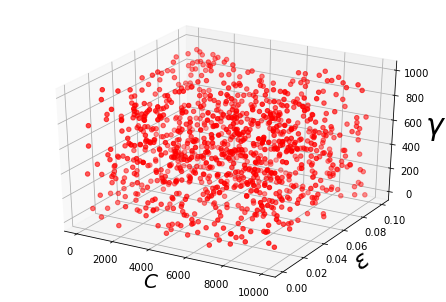

KeyboardInterrupt: 

In [17]:
pso(1000, 100, 3, 1)

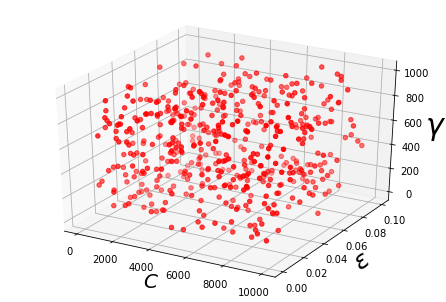





iterasi ke # 0 = 0.000000 

iterasi ke # 0 = 1.000000 

iterasi ke # 0 = 2.000000 

iterasi ke # 0 = 3.000000 

iterasi ke # 0 = 4.000000 

iterasi ke # 0 = 5.000000 

iterasi ke # 0 = 6.000000 

iterasi ke # 0 = 7.000000 

iterasi ke # 0 = 8.000000 

iterasi ke # 0 = 9.000000 

iterasi ke # 0 = 10.000000 

iterasi ke # 0 = 11.000000 

iterasi ke # 0 = 12.000000 

iterasi ke # 0 = 13.000000 

iterasi ke # 0 = 14.000000 

iterasi ke # 0 = 15.000000 

iterasi ke # 0 = 16.000000 

iterasi ke # 0 = 17.000000 

iterasi ke # 0 = 18.000000 

iterasi ke # 0 = 19.000000 

iterasi ke # 0 = 20.000000 

iterasi ke # 0 = 21.000000 

iterasi ke # 0 = 22.000000 

iterasi ke # 0 = 23.000000 

iterasi ke # 0 = 24.000000 

iterasi ke # 0 = 25.000000 

iterasi ke # 0 = 26.000000 

iterasi ke # 0 = 27.000000 

iterasi ke # 0 = 28.000000 

iterasi ke # 0 = 29.000000 

iterasi ke # 0 = 30.000000 

iterasi ke # 0 = 31.000000 

iterasi ke # 0 = 32.000000 

iterasi ke # 0 = 33.000000 

iterasi ke # 0 = 34.


iterasi ke # 0 = 277.000000 

iterasi ke # 0 = 278.000000 

iterasi ke # 0 = 279.000000 

iterasi ke # 0 = 280.000000 

iterasi ke # 0 = 281.000000 

iterasi ke # 0 = 282.000000 

iterasi ke # 0 = 283.000000 

iterasi ke # 0 = 284.000000 

iterasi ke # 0 = 285.000000 

iterasi ke # 0 = 286.000000 

iterasi ke # 0 = 287.000000 

iterasi ke # 0 = 288.000000 

iterasi ke # 0 = 289.000000 

iterasi ke # 0 = 290.000000 

iterasi ke # 0 = 291.000000 

iterasi ke # 0 = 292.000000 

iterasi ke # 0 = 293.000000 

iterasi ke # 0 = 294.000000 

iterasi ke # 0 = 295.000000 

iterasi ke # 0 = 296.000000 

iterasi ke # 0 = 297.000000 

iterasi ke # 0 = 298.000000 

iterasi ke # 0 = 299.000000 

iterasi ke # 0 = 300.000000 

iterasi ke # 0 = 301.000000 

iterasi ke # 0 = 302.000000 

iterasi ke # 0 = 303.000000 

iterasi ke # 0 = 304.000000 

iterasi ke # 0 = 305.000000 

iterasi ke # 0 = 306.000000 

iterasi ke # 0 = 307.000000 

iterasi ke # 0 = 308.000000 

iterasi ke # 0 = 309.000000 

iterasi k

iterasi ke # 1 = 51.000000 

iterasi ke # 1 = 52.000000 

iterasi ke # 1 = 53.000000 

iterasi ke # 1 = 54.000000 

iterasi ke # 1 = 55.000000 

iterasi ke # 1 = 56.000000 

iterasi ke # 1 = 57.000000 

iterasi ke # 1 = 58.000000 

iterasi ke # 1 = 59.000000 

iterasi ke # 1 = 60.000000 

iterasi ke # 1 = 61.000000 

iterasi ke # 1 = 62.000000 

iterasi ke # 1 = 63.000000 

iterasi ke # 1 = 64.000000 

iterasi ke # 1 = 65.000000 

iterasi ke # 1 = 66.000000 

iterasi ke # 1 = 67.000000 

iterasi ke # 1 = 68.000000 

iterasi ke # 1 = 69.000000 

iterasi ke # 1 = 70.000000 

iterasi ke # 1 = 71.000000 

iterasi ke # 1 = 72.000000 

iterasi ke # 1 = 73.000000 

iterasi ke # 1 = 74.000000 

iterasi ke # 1 = 75.000000 

iterasi ke # 1 = 76.000000 

iterasi ke # 1 = 77.000000 

iterasi ke # 1 = 78.000000 

iterasi ke # 1 = 79.000000 

iterasi ke # 1 = 80.000000 

iterasi ke # 1 = 81.000000 

iterasi ke # 1 = 82.000000 

iterasi ke # 1 = 83.000000 

iterasi ke # 1 = 84.000000 

iterasi ke # 1

iterasi ke # 1 = 329.000000 

iterasi ke # 1 = 330.000000 

iterasi ke # 1 = 331.000000 

iterasi ke # 1 = 332.000000 

iterasi ke # 1 = 333.000000 

iterasi ke # 1 = 334.000000 

iterasi ke # 1 = 335.000000 

iterasi ke # 1 = 336.000000 

iterasi ke # 1 = 337.000000 

iterasi ke # 1 = 338.000000 

iterasi ke # 1 = 339.000000 

iterasi ke # 1 = 340.000000 

iterasi ke # 1 = 341.000000 

iterasi ke # 1 = 342.000000 

iterasi ke # 1 = 343.000000 

iterasi ke # 1 = 344.000000 

iterasi ke # 1 = 345.000000 

iterasi ke # 1 = 346.000000 

iterasi ke # 1 = 347.000000 

iterasi ke # 1 = 348.000000 

iterasi ke # 1 = 349.000000 

iterasi ke # 1 = 350.000000 

iterasi ke # 1 = 351.000000 

iterasi ke # 1 = 352.000000 

iterasi ke # 1 = 353.000000 

iterasi ke # 1 = 354.000000 

iterasi ke # 1 = 355.000000 

iterasi ke # 1 = 356.000000 

iterasi ke # 1 = 357.000000 

iterasi ke # 1 = 358.000000 

iterasi ke # 1 = 359.000000 

iterasi ke # 1 = 360.000000 

iterasi ke # 1 = 361.000000 

iterasi ke


iterasi ke # 2 = 106.000000 

iterasi ke # 2 = 107.000000 

iterasi ke # 2 = 108.000000 

iterasi ke # 2 = 109.000000 

iterasi ke # 2 = 110.000000 

iterasi ke # 2 = 111.000000 

iterasi ke # 2 = 112.000000 

iterasi ke # 2 = 113.000000 

iterasi ke # 2 = 114.000000 

iterasi ke # 2 = 115.000000 

iterasi ke # 2 = 116.000000 

iterasi ke # 2 = 117.000000 

iterasi ke # 2 = 118.000000 

iterasi ke # 2 = 119.000000 

iterasi ke # 2 = 120.000000 

iterasi ke # 2 = 121.000000 

iterasi ke # 2 = 122.000000 

iterasi ke # 2 = 123.000000 

iterasi ke # 2 = 124.000000 

iterasi ke # 2 = 125.000000 

iterasi ke # 2 = 126.000000 

iterasi ke # 2 = 127.000000 

iterasi ke # 2 = 128.000000 

iterasi ke # 2 = 129.000000 

iterasi ke # 2 = 130.000000 

iterasi ke # 2 = 131.000000 

iterasi ke # 2 = 132.000000 

iterasi ke # 2 = 133.000000 

iterasi ke # 2 = 134.000000 

iterasi ke # 2 = 135.000000 

iterasi ke # 2 = 136.000000 

iterasi ke # 2 = 137.000000 

iterasi ke # 2 = 138.000000 

iterasi k

In [ ]:
pso(500, 50, 3, 1)

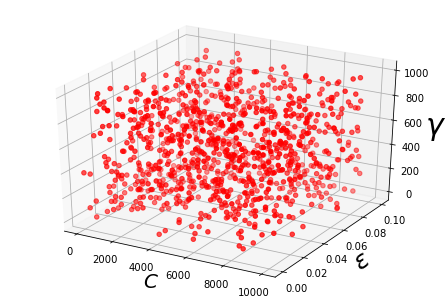





Best value iteration # 0 = 0.026229

Best value iteration # 1 = 0.000063

Best value iteration # 2 = 0.000063

Best value iteration # 3 = 0.000063

Best value iteration # 4 = 0.000062

Best value iteration # 5 = 0.000062

Best value iteration # 6 = 0.000061

Best value iteration # 7 = 0.000061

Best value iteration # 8 = 0.000061

Best value iteration # 9 = 0.000061

Best value iteration # 10 = 0.000061

Best value iteration # 11 = 0.000061

Best value iteration # 12 = 0.000060

Best value iteration # 13 = 0.000060

Best value iteration # 14 = 0.000060

Best value iteration # 15 = 0.000060

Best value iteration # 16 = 0.000060

Best value iteration # 17 = 0.000060

Best value iteration # 18 = 0.000060

Best value iteration # 19 = 0.000060

Best value iteration # 20 = 0.000060

Best value iteration # 21 = 0.000060

Best value iteration # 22 = 0.000060

Best value iteration # 23 = 0.000060

Best value iteration # 24 = 0.000060

Best value iteration # 25 = 0.000060

Best value iterati

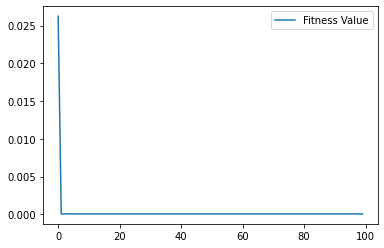

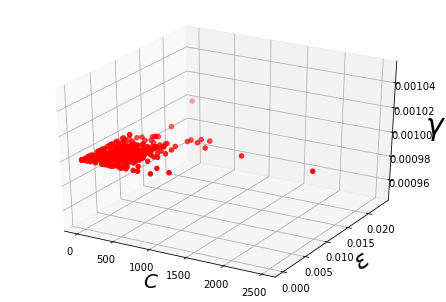





Predictions with the Population Best Value found:



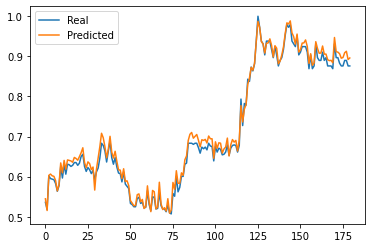





Mean Squared Error for the Test Set:	 0.000165




Predictions Average:	 0.724515




Predictions Median:	 0.681220






In [18]:
pso(1000, 100, 3, 0.8)

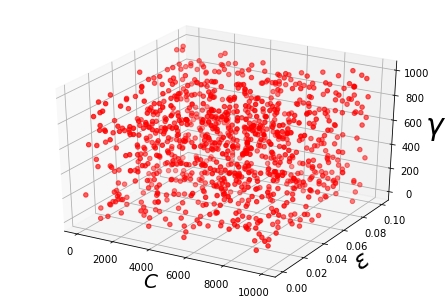





Best value iteration # 0 = 0.011871

Best value iteration # 1 = 0.000069

Best value iteration # 2 = 0.000064

Best value iteration # 3 = 0.000063

Best value iteration # 4 = 0.000063

Best value iteration # 5 = 0.000063

Best value iteration # 6 = 0.000062

Best value iteration # 7 = 0.000061

Best value iteration # 8 = 0.000061

Best value iteration # 9 = 0.000060

Best value iteration # 10 = 0.000060

Best value iteration # 11 = 0.000060

Best value iteration # 12 = 0.000060

Best value iteration # 13 = 0.000060

Best value iteration # 14 = 0.000060

Best value iteration # 15 = 0.000060

Best value iteration # 16 = 0.000060

Best value iteration # 17 = 0.000060

Best value iteration # 18 = 0.000060

Best value iteration # 19 = 0.000060

Best value iteration # 20 = 0.000060

Best value iteration # 21 = 0.000060

Best value iteration # 22 = 0.000060

Best value iteration # 23 = 0.000060

Best value iteration # 24 = 0.000060

Best value iteration # 25 = 0.000060

Best value iterati

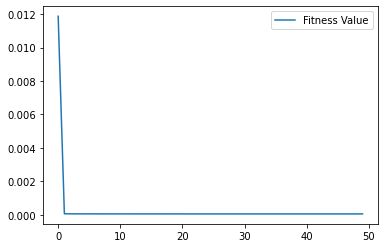

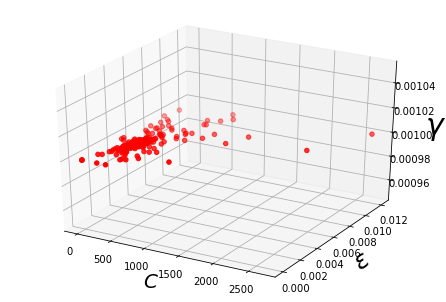





Predictions with the Population Best Value found:



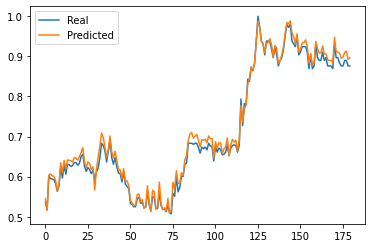





Mean Squared Error for the Test Set:	 0.000170




Predictions Average:	 0.724772




Predictions Median:	 0.681446






In [24]:
pso(1000, 50, 3, 0.6)

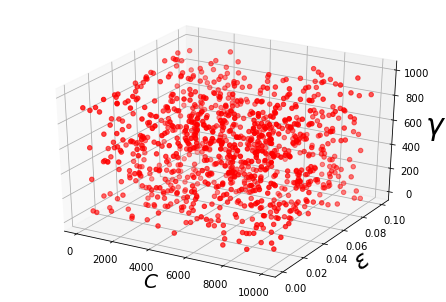





Best value iteration # 0 = 0.046954

Best value iteration # 1 = 0.000118

Best value iteration # 2 = 0.000063

Best value iteration # 3 = 0.000062

Best value iteration # 4 = 0.000062

Best value iteration # 5 = 0.000061

Best value iteration # 6 = 0.000061

Best value iteration # 7 = 0.000061

Best value iteration # 8 = 0.000061

Best value iteration # 9 = 0.000060

Best value iteration # 10 = 0.000060

Best value iteration # 11 = 0.000060

Best value iteration # 12 = 0.000060

Best value iteration # 13 = 0.000060

Best value iteration # 14 = 0.000060

Best value iteration # 15 = 0.000060

Best value iteration # 16 = 0.000060

Best value iteration # 17 = 0.000060

Best value iteration # 18 = 0.000060

Best value iteration # 19 = 0.000060

Best value iteration # 20 = 0.000060

Best value iteration # 21 = 0.000060

Best value iteration # 22 = 0.000060

Best value iteration # 23 = 0.000060

Best value iteration # 24 = 0.000059

Best value iteration # 25 = 0.000059

Best value iterati

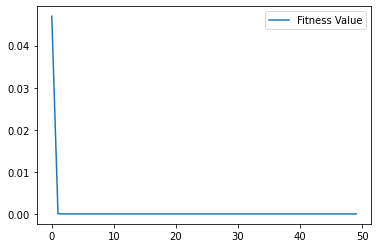

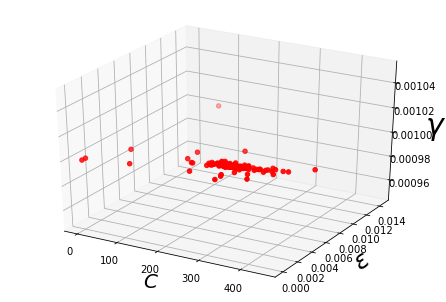





Predictions with the Population Best Value found:



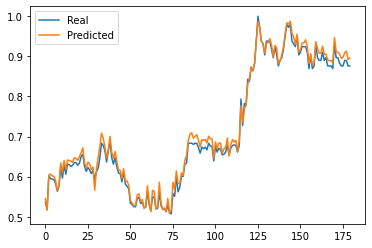





Mean Squared Error for the Test Set:	 0.000163




Predictions Average:	 0.724433




Predictions Median:	 0.681273






In [25]:
pso(1000, 50, 3, 0.4)

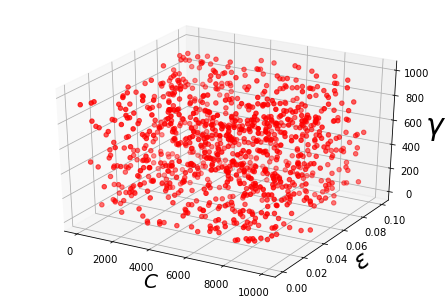





Best value iteration # 0 = 0.008739

Best value iteration # 1 = 0.000066

Best value iteration # 2 = 0.000062

Best value iteration # 3 = 0.000062

Best value iteration # 4 = 0.000062

Best value iteration # 5 = 0.000062

Best value iteration # 6 = 0.000062

Best value iteration # 7 = 0.000062

Best value iteration # 8 = 0.000062

Best value iteration # 9 = 0.000061

Best value iteration # 10 = 0.000061

Best value iteration # 11 = 0.000061

Best value iteration # 12 = 0.000061

Best value iteration # 13 = 0.000061

Best value iteration # 14 = 0.000061

Best value iteration # 15 = 0.000061

Best value iteration # 16 = 0.000061

Best value iteration # 17 = 0.000061

Best value iteration # 18 = 0.000060

Best value iteration # 19 = 0.000060

Best value iteration # 20 = 0.000060

Best value iteration # 21 = 0.000060

Best value iteration # 22 = 0.000060

Best value iteration # 23 = 0.000060

Best value iteration # 24 = 0.000060

Best value iteration # 25 = 0.000060

Best value iterati

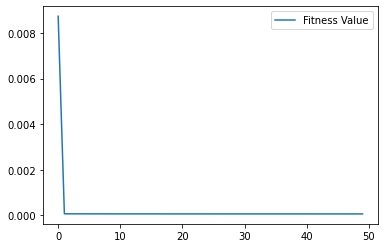

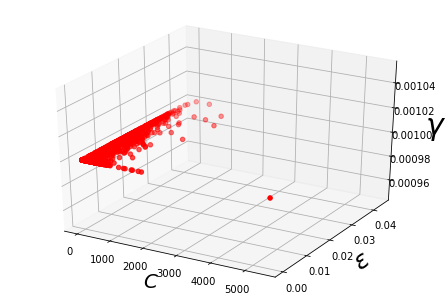





Predictions with the Population Best Value found:



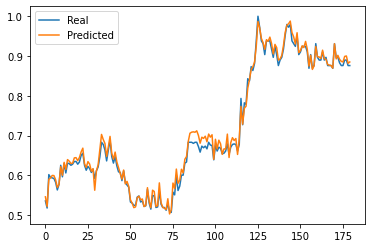





Mean Squared Error for the Test Set:	 0.000132




Predictions Average:	 0.721362




Predictions Median:	 0.681557






In [26]:
pso(1000, 50, 3, 0.9)

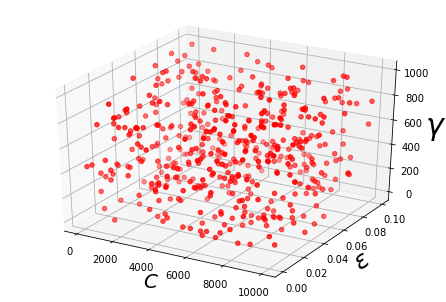





Best value iteration # 0 = 0.032906

Best value iteration # 1 = 0.000075



KeyboardInterrupt: 

In [27]:
pso(500, 50, 3, 0.8)

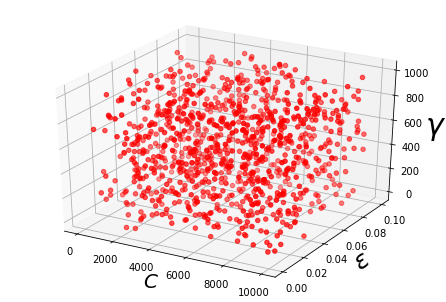





Best value iteration # 0 = 0.036432

Best value iteration # 1 = 0.000062

Best value iteration # 2 = 0.000061

Best value iteration # 3 = 0.000061

Best value iteration # 4 = 0.000061

Best value iteration # 5 = 0.000061

Best value iteration # 6 = 0.000061

Best value iteration # 7 = 0.000061

Best value iteration # 8 = 0.000061

Best value iteration # 9 = 0.000061

Group Best configuration found: 
[5.31831107e+01 1.51421110e-02 1.00000000e-03]


Best Regressor:

SVR(C=53.18311067283048, epsilon=0.015142110991018167, gamma=0.001)




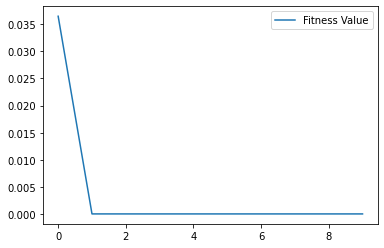

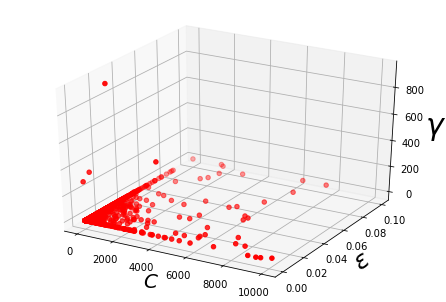





Predictions with the Population Best Value found:



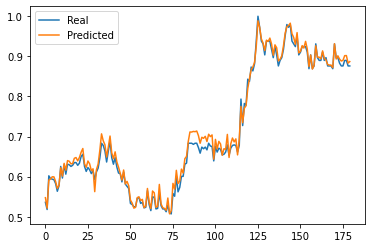





Mean Squared Error for the Test Set:	 0.000158




Predictions Average:	 0.722789




Predictions Median:	 0.682364






In [18]:
pso(1000, 10, 3, 1)

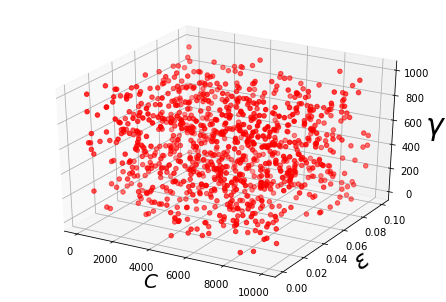





Best value iteration # 0 = 0.033833

Best value iteration # 1 = 0.000064

Best value iteration # 2 = 0.000062

Best value iteration # 3 = 0.000062

Best value iteration # 4 = 0.000062

Best value iteration # 5 = 0.000062

Best value iteration # 6 = 0.000062

Best value iteration # 7 = 0.000062

Best value iteration # 8 = 0.000062

Best value iteration # 9 = 0.000062

Best value iteration # 10 = 0.000062

Best value iteration # 11 = 0.000062

Best value iteration # 12 = 0.000061

Best value iteration # 13 = 0.000061

Best value iteration # 14 = 0.000060

Best value iteration # 15 = 0.000060

Best value iteration # 16 = 0.000060

Best value iteration # 17 = 0.000060

Best value iteration # 18 = 0.000060

Best value iteration # 19 = 0.000060

Best value iteration # 20 = 0.000060

Best value iteration # 21 = 0.000060

Best value iteration # 22 = 0.000060

Best value iteration # 23 = 0.000060

Best value iteration # 24 = 0.000060

Group Best configuration found: 
[5.21949530e+01 1.58784

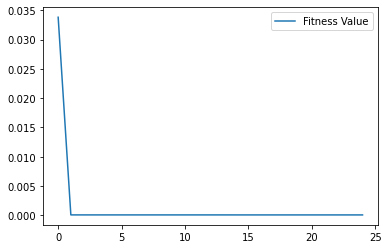

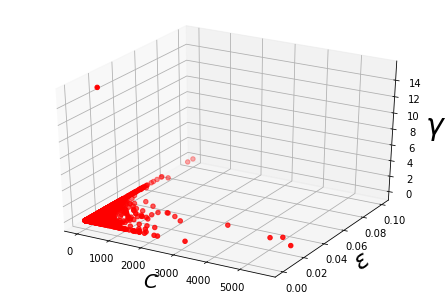





Predictions with the Population Best Value found:



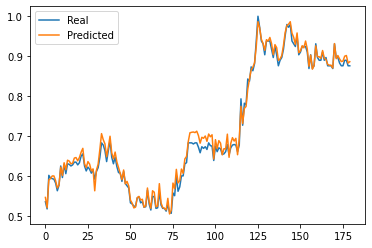





Mean Squared Error for the Test Set:	 0.000150




Predictions Average:	 0.722344




Predictions Median:	 0.682398






In [20]:
pso(1000, 25, 3, 1)

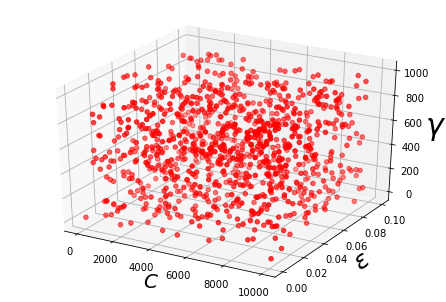





Best value iteration # 0 = 0.026689

Best value iteration # 1 = 0.000069

Best value iteration # 2 = 0.000067

Best value iteration # 3 = 0.000067

Best value iteration # 4 = 0.000067

Best value iteration # 5 = 0.000067

Best value iteration # 6 = 0.000067

Best value iteration # 7 = 0.000063

Best value iteration # 8 = 0.000061

Best value iteration # 9 = 0.000061

Best value iteration # 10 = 0.000061

Best value iteration # 11 = 0.000061

Best value iteration # 12 = 0.000061

Best value iteration # 13 = 0.000061

Best value iteration # 14 = 0.000061

Best value iteration # 15 = 0.000061

Best value iteration # 16 = 0.000061

Best value iteration # 17 = 0.000061

Best value iteration # 18 = 0.000061

Best value iteration # 19 = 0.000061

Group Best configuration found: 
[2.85921166e+02 3.89364740e-03 1.00000000e-03]


Best Regressor:

SVR(C=285.9211664481886, epsilon=0.0038936474000461443, gamma=0.001)




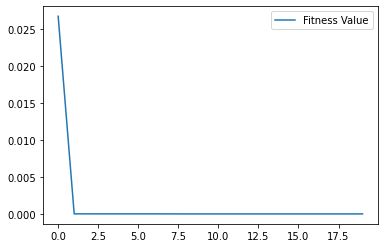

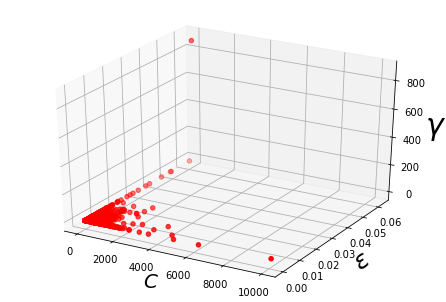





Predictions with the Population Best Value found:



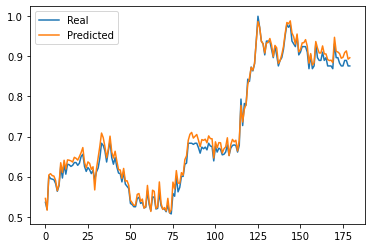





Mean Squared Error for the Test Set:	 0.000175




Predictions Average:	 0.725004




Predictions Median:	 0.681831






In [21]:
pso(1000, 20, 3, 1)

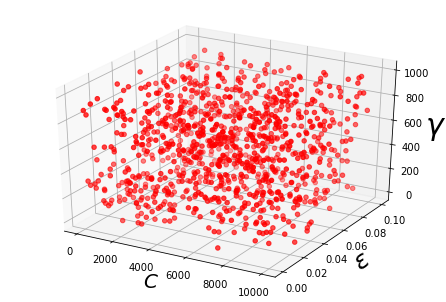





Best value iteration # 0 = 0.026773

Best value iteration # 1 = 0.000062

Best value iteration # 2 = 0.000059

Best value iteration # 3 = 0.000052

Best value iteration # 4 = 0.000052

Best value iteration # 5 = 0.000052

Best value iteration # 6 = 0.000052

Best value iteration # 7 = 0.000052

Best value iteration # 8 = 0.000052

Best value iteration # 9 = 0.000052

Best value iteration # 10 = 0.000052

Best value iteration # 11 = 0.000050

Best value iteration # 12 = 0.000050

Best value iteration # 13 = 0.000050

Best value iteration # 14 = 0.000050

Best value iteration # 15 = 0.000050

Best value iteration # 16 = 0.000050

Best value iteration # 17 = 0.000050

Best value iteration # 18 = 0.000050

Best value iteration # 19 = 0.000050

Best value iteration # 20 = 0.000050

Best value iteration # 21 = 0.000050

Best value iteration # 22 = 0.000049

Best value iteration # 23 = 0.000049

Best value iteration # 24 = 0.000049

Best value iteration # 25 = 0.000049

Best value iterati

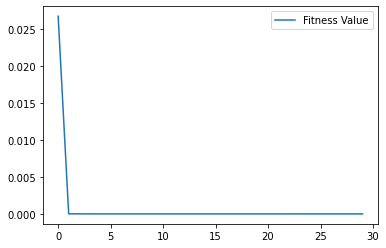

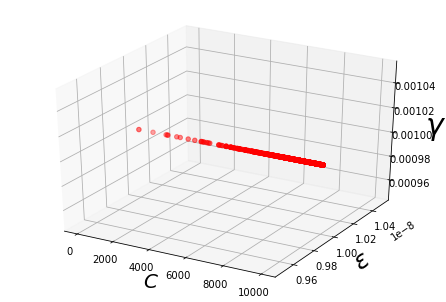





Predictions with the Population Best Value found:



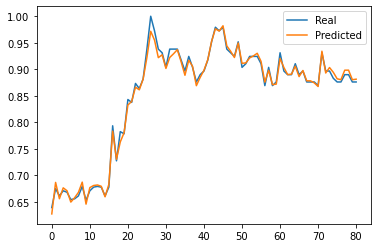





Mean Squared Error for the Test Set:	 0.000054




Predictions Average:	 0.851946




Predictions Median:	 0.889922






In [18]:
pso(1000, 30, 3, 1)

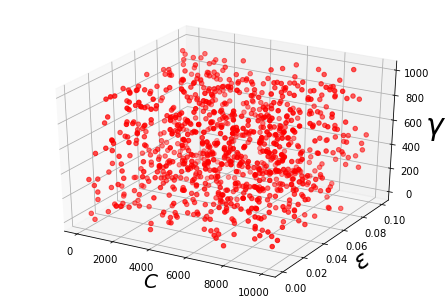





Best value iteration # 0 = 0.006839

Best value iteration # 1 = 0.000063

Best value iteration # 2 = 0.000056

Best value iteration # 3 = 0.000051

Best value iteration # 4 = 0.000050

Best value iteration # 5 = 0.000050

Best value iteration # 6 = 0.000050

Best value iteration # 7 = 0.000050

Best value iteration # 8 = 0.000050

Best value iteration # 9 = 0.000049

Group Best configuration found: 
[5.21478569e+03 1.00000000e-08 1.00000000e-03]


Best Regressor:

SVR(C=5214.785694988472, epsilon=1e-08, gamma=0.001)




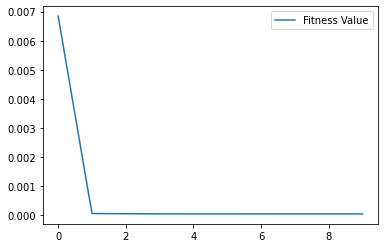

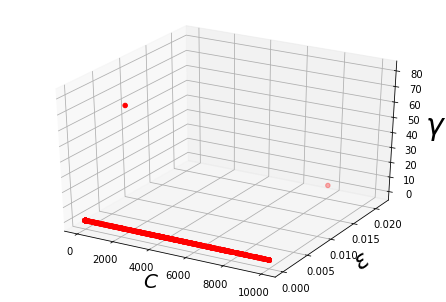





Predictions with the Population Best Value found:



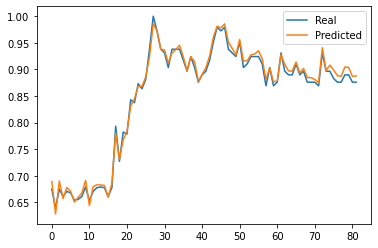





Mean Squared Error for the Test Set:	 0.000070




Predictions Average:	 0.855262




Predictions Median:	 0.896965






In [31]:
#ini terakhir 
pso(965, 10, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.027649

Best value iteration # 1 = 0.000053

Best value iteration # 2 = 0.000050

Best value iteration # 3 = 0.000049

Best value iteration # 4 = 0.000049

Best value iteration # 5 = 0.000049

Best value iteration # 6 = 0.000049

Best value iteration # 7 = 0.000049

Best value iteration # 8 = 0.000049

Best value iteration # 9 = 0.000049

Best value iteration # 10 = 0.000049

Best value iteration # 11 = 0.000049

Best value iteration # 12 = 0.000049

Best value iteration # 13 = 0.000049

Best value iteration # 14 = 0.000049

Best value iteration # 15 = 0.000049

Best value iteration # 16 = 0.000049

Best value iteration # 17 = 0.000049

Best value iteration # 18 = 0.000049

Best value iteration # 19 = 0.000049

Best value iteration # 20 = 0.000049

Best value iteration # 21 = 0.000049

Best value iteration # 22 = 0.000049

Best value iteration # 23 = 0.000049

Best value iteration # 24 = 0.000049

Best value iteration # 25 = 0.000049

Best value iterati

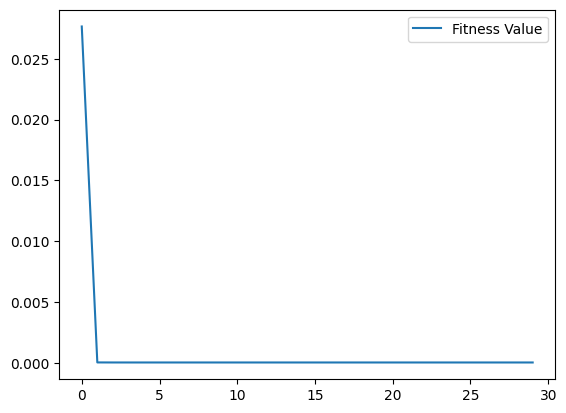

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



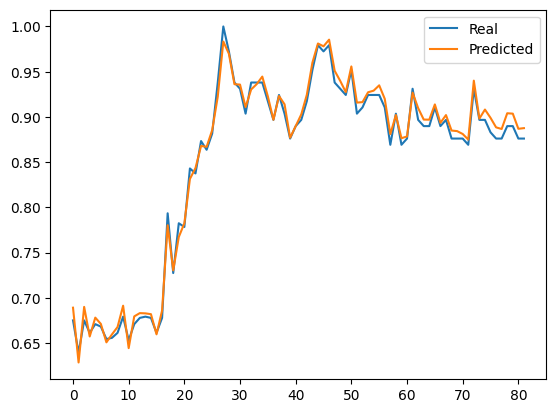





Mean Squared Error for the Test Set:	 0.000069




Predictions Average:	 0.854881




Predictions Median:	 0.896861






In [31]:
#ini terakhir 
pso(965, 30, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.000172

Best value iteration # 1 = 0.000051

Best value iteration # 2 = 0.000050

Best value iteration # 3 = 0.000049

Best value iteration # 4 = 0.000049

Best value iteration # 5 = 0.000049

Best value iteration # 6 = 0.000049

Best value iteration # 7 = 0.000049

Best value iteration # 8 = 0.000049

Best value iteration # 9 = 0.000049

Best value iteration # 10 = 0.000049

Best value iteration # 11 = 0.000049

Best value iteration # 12 = 0.000049

Best value iteration # 13 = 0.000049

Best value iteration # 14 = 0.000049

Best value iteration # 15 = 0.000049

Best value iteration # 16 = 0.000049

Best value iteration # 17 = 0.000049

Best value iteration # 18 = 0.000049

Best value iteration # 19 = 0.000049

Best value iteration # 20 = 0.000049

Best value iteration # 21 = 0.000049

Best value iteration # 22 = 0.000049

Best value iteration # 23 = 0.000049

Best value iteration # 24 = 0.000049

Best value iteration # 25 = 0.000049

Best value iterati

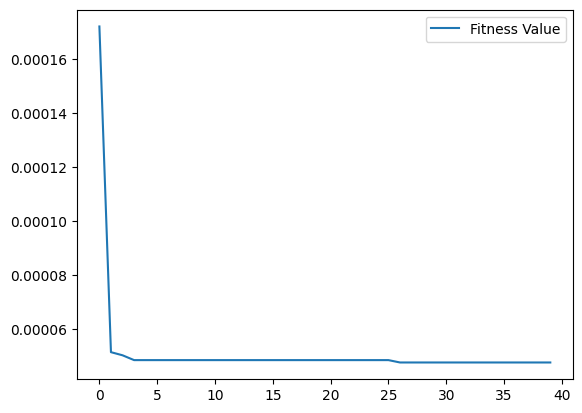

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



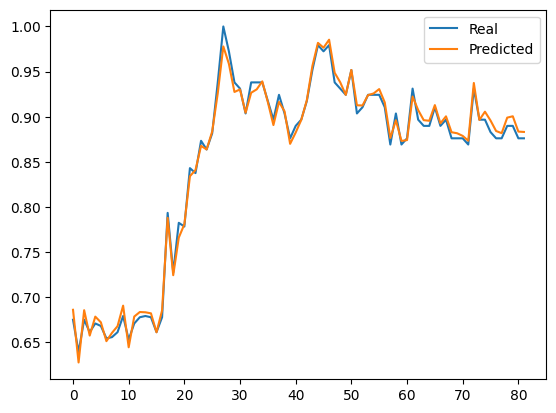





Mean Squared Error for the Test Set:	 0.000052




Predictions Average:	 0.852120




Predictions Median:	 0.894053






In [32]:
#ini terakhir 
pso(965, 40, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.014899

Best value iteration # 1 = 0.000052

Best value iteration # 2 = 0.000049

Best value iteration # 3 = 0.000049

Best value iteration # 4 = 0.000049

Best value iteration # 5 = 0.000049

Best value iteration # 6 = 0.000049

Best value iteration # 7 = 0.000048

Best value iteration # 8 = 0.000048

Best value iteration # 9 = 0.000048

Best value iteration # 10 = 0.000048

Best value iteration # 11 = 0.000048

Best value iteration # 12 = 0.000048

Best value iteration # 13 = 0.000048

Best value iteration # 14 = 0.000048

Best value iteration # 15 = 0.000048

Best value iteration # 16 = 0.000048

Best value iteration # 17 = 0.000048

Best value iteration # 18 = 0.000048

Best value iteration # 19 = 0.000048

Best value iteration # 20 = 0.000048

Best value iteration # 21 = 0.000048

Best value iteration # 22 = 0.000048

Best value iteration # 23 = 0.000048

Best value iteration # 24 = 0.000048

Group Best configuration found: 
[5.43185955e+03 1.00000

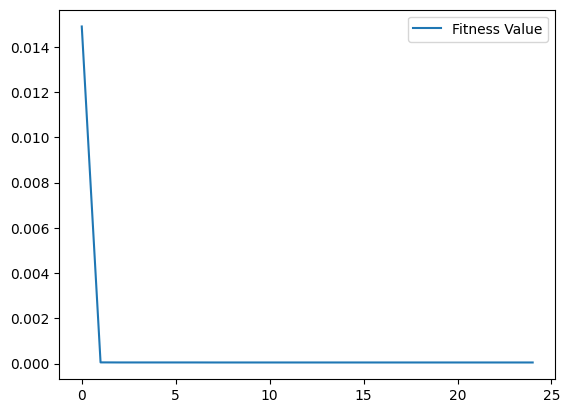

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



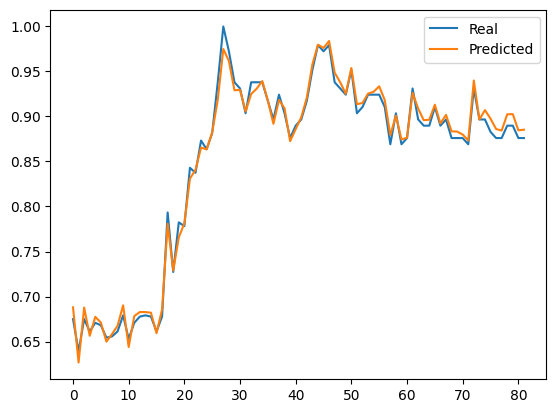





Mean Squared Error for the Test Set:	 0.000066




Predictions Average:	 0.852765




Predictions Median:	 0.894110






In [33]:
#ini terakhir 
pso(965, 25, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.001765

Best value iteration # 1 = 0.000050

Best value iteration # 2 = 0.000050

Best value iteration # 3 = 0.000050

Best value iteration # 4 = 0.000050

Best value iteration # 5 = 0.000050

Best value iteration # 6 = 0.000049

Best value iteration # 7 = 0.000049

Best value iteration # 8 = 0.000049

Best value iteration # 9 = 0.000049

Best value iteration # 10 = 0.000049

Best value iteration # 11 = 0.000049

Best value iteration # 12 = 0.000049

Best value iteration # 13 = 0.000049

Best value iteration # 14 = 0.000049

Best value iteration # 15 = 0.000049

Best value iteration # 16 = 0.000049

Best value iteration # 17 = 0.000049

Best value iteration # 18 = 0.000049

Best value iteration # 19 = 0.000049

Group Best configuration found: 
[5.32362148e+03 1.00000000e-08 1.00000000e-03]


Best Regressor:

SVR(C=5323.621475844955, epsilon=1e-08, gamma=0.001)




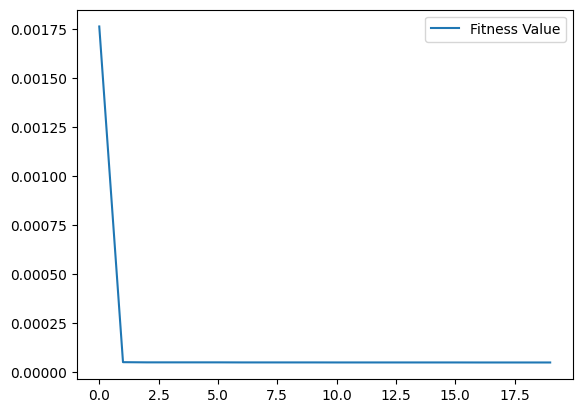

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



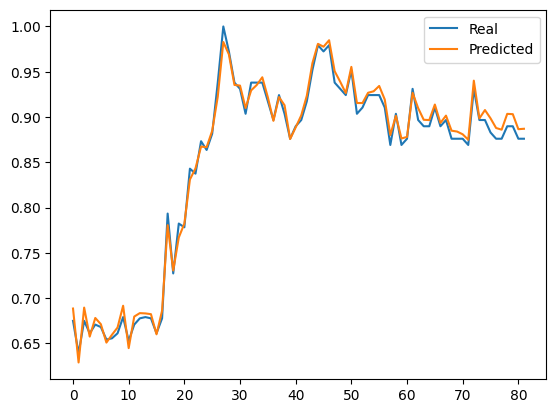





Mean Squared Error for the Test Set:	 0.000066




Predictions Average:	 0.854570




Predictions Median:	 0.896232






In [34]:
#ini terakhir 
pso(965, 20, 3, 1)

<Figure size 640x480 with 0 Axes>





Best value iteration # 0 = 0.027410

Best value iteration # 1 = 0.000063

Best value iteration # 2 = 0.000063

Best value iteration # 3 = 0.000051

Best value iteration # 4 = 0.000049

Best value iteration # 5 = 0.000049

Best value iteration # 6 = 0.000049

Best value iteration # 7 = 0.000049

Best value iteration # 8 = 0.000049

Best value iteration # 9 = 0.000049

Best value iteration # 10 = 0.000049

Best value iteration # 11 = 0.000049

Best value iteration # 12 = 0.000049

Best value iteration # 13 = 0.000049

Best value iteration # 14 = 0.000049

Group Best configuration found: 
[5.34097607e+03 1.00000000e-08 1.00000000e-03]


Best Regressor:

SVR(C=5340.976067176885, epsilon=1e-08, gamma=0.001)




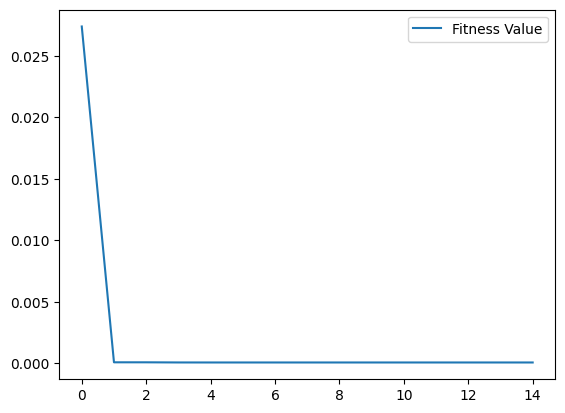

<Figure size 640x480 with 0 Axes>





Predictions with the Population Best Value found:



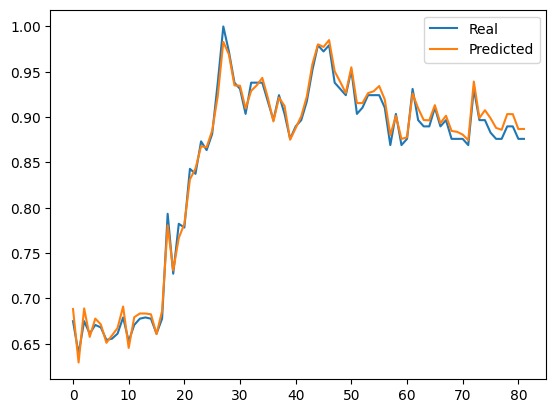





Mean Squared Error for the Test Set:	 0.000064




Predictions Average:	 0.854459




Predictions Median:	 0.895886






In [31]:
#ini terakhir 
pso(965, 15, 3, 1)

In [31]:
data_f = datacomplete_clean.copy()
x = data_f.drop(labels='Close', axis=1).values
y = data_f['Close'].values

array_to_list = y.tolist()

array_to_list.pop(0)
final_numpy_array = np.asarray(array_to_list)
#final_numpy_array.shape


In [37]:
#prediction
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error

rgs = svm.SVR(C = 6942.983321724399 , epsilon = 0.00000001, gamma = 0.001)
rgs.fit(x, y)

y_predict = rgs.predict(x)
y_predict_to_list = y_predict.tolist()
y_predict_to_list.pop(905)
y_predict_numpy_array = np.asarray(y_predict_to_list)



mse = mean_squared_error(final_numpy_array,y_predict_numpy_array)

#mape= mean_absolute_percentage_error(final_numpy_array, y_predict_numpy_array)
forecast = pd.DataFrame(y_predict_numpy_array, columns=['y(t)'])
forecast['y']= final_numpy_array
forecast = forecast[['y', 'y(t)']]

forecast.to_csv('forecast2.csv', index=True)
#mape

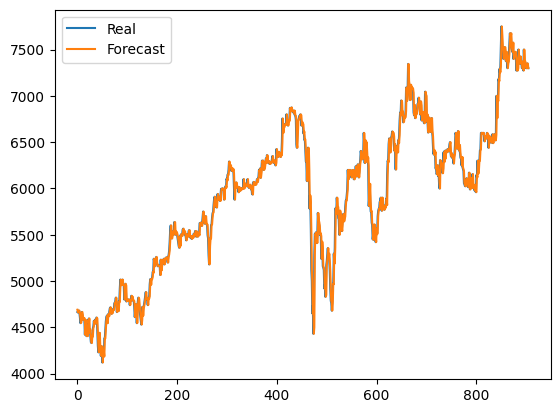

In [34]:
plt.plot(range(len(final_numpy_array)), final_numpy_array, label='Real')
plt.plot(range(len(y_predict_numpy_array)), y_predict_numpy_array, label='Forecast')
plt.legend()
plt.show()


In [35]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.1.
